## Plankpose diagnostics - fulladapt - impacts in mins per worker

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import geopandas as gpd
from itertools import product
import os, sys

USER = os.getenv("USER")
import seaborn as sns

sns.set_context("poster")

In [2]:
# set up paths
plankpose = "/shares/gcp/outputs/labor/impacts-woodwork/hi_1factor_lo_unint_mixed_model_plankpose/combined_mixed_splines_27_37_39_by_risk_empshare_noFE_YearlyAverageDay/rcp85/CCSM4/high/SSP3/csv"
downdog = "/shares/gcp/outputs/labor/impacts-woodwork/hi_1factor_lo_unint_mixed_model_downdog_copy/combined_mixed_splines_27_37_39_by_risk_empshare_noFE_YearlyAverageDay/rcp85/CCSM4/high/SSP3/csv"

output_dir = "~/repos/labor-code-release-2020/output/figures/plankpose"

basename = "hi_1factor_lo_unint_mixed_model_splines_empshare_noFE"

In [3]:
# shapefile
shp_file = gpd.read_file(
            f"/shares/gcp/climate/_spatial_data/world-combo-new-nytimes/new_shapefile.shp"
        )
# shp_file.hierid.astype(object)

In [4]:
# map function
def make_map(
    df,
    colname,
    title,
    name_file,
    location,
    figsize=(30, 15),
    color_scale="YlOrRd",
    color_max=None,
    color_min=None,
    save_path=None,
    maxmin=False,
):
    font = {
        "family": "serif",
        "color": "black",
        "weight": "normal",
        "size": 14,
    }

    # create figure
    fig, ax = plt.subplots(figsize=figsize, facecolor="white")

    if color_max == None:
        max_val = max(abs(df[colname].max()), abs(df[colname].min()))
        color_min, color_max = -max_val, max_val

    # # add the colorbar to the figure
    # sm = plt.cm.ScalarMappable(
    #     cmap=color_scale, norm=plt.Normalize(vmin=color_min, vmax=color_max)
    # )
    # fig.colorbar(sm, orientation="horizontal", fraction=0.03, pad=0.02, aspect=20)
    # ax.figure.axes[1].tick_params(labelsize=14)

    # Plotting function -- from geopandas
    ax = df.plot(
        column=colname,
        cmap=color_scale,
        edgecolor="face",
        norm=mpl.colors.Normalize(vmin=color_min, vmax=color_max),
        missing_kwds={
            "color": "white",
            "edgecolor": "lightgrey",
            "linewidth":.05,
        },
        ax=ax
    )
    
    fig.text(0.52, 0.08, title, ha="center", va="center", rotation=0, fontsize=18)

    ax.set_axis_off()
    if maxmin == True:
        plt.annotate(
            text=f"min: {df[colname].min()}, max: {df[colname].max()}",
            xy=location,
            xycoords="axes fraction",
            fontsize=10,
        )

    if save_path != None:
        os.makedirs(output_dir, exist_ok=True)
        fig.savefig(f"{output_dir}/{name_file}", dpi=200, bbox_inches="tight")

In [5]:
# plankpose high risk impacts 
pp_hr = pd.read_csv(f"{plankpose}/{basename}-highriskimpacts.csv")
pp_hr = pp_hr.loc[pp_hr['year']==2099]

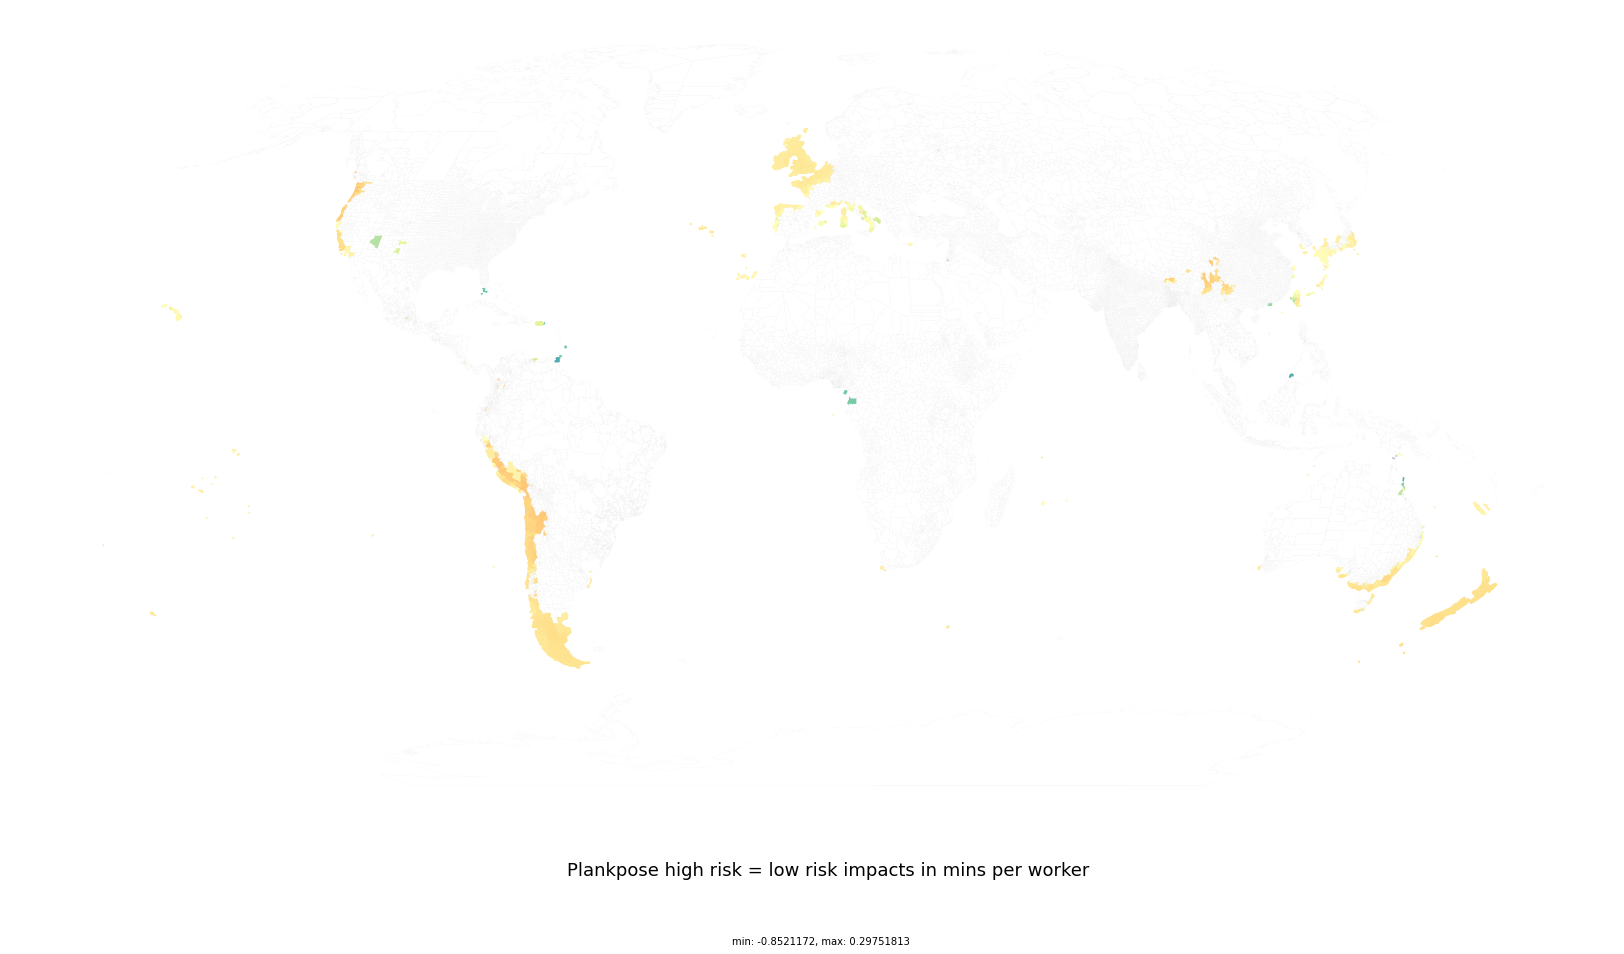

In [6]:
# compare plankpose high risk = plankpose low risk
pp_lr = pd.read_csv(f"{plankpose}/{basename}-lowriskimpacts.csv")
pp_lr = pp_lr.loc[pp_lr['year']==2099]

# merge 
pp_hl = pd.merge(pp_hr, pp_lr, how='inner', on=['region', 'value', 'year'])
pp_hl = pp_hl.rename(columns={"region": "hierid"})
# pp.hierid.astype(object)

# change crs to World_Robinson to make the standard CIL map and make map
map = shp_file.merge(pp_hl, on='hierid', how='left').to_crs('World_Robinson')

make_map(
    df=map,
    colname='value',
    title="Plankpose high risk = low risk impacts in mins per worker",
    name_file='map_pp_hr_lr.pdf',
    location=(0.45, -0.15),
    figsize=(30, 15),
    color_scale="Spectral_r",
    color_max=None,
    color_min=None,
    save_path=None,
    maxmin=True,
)

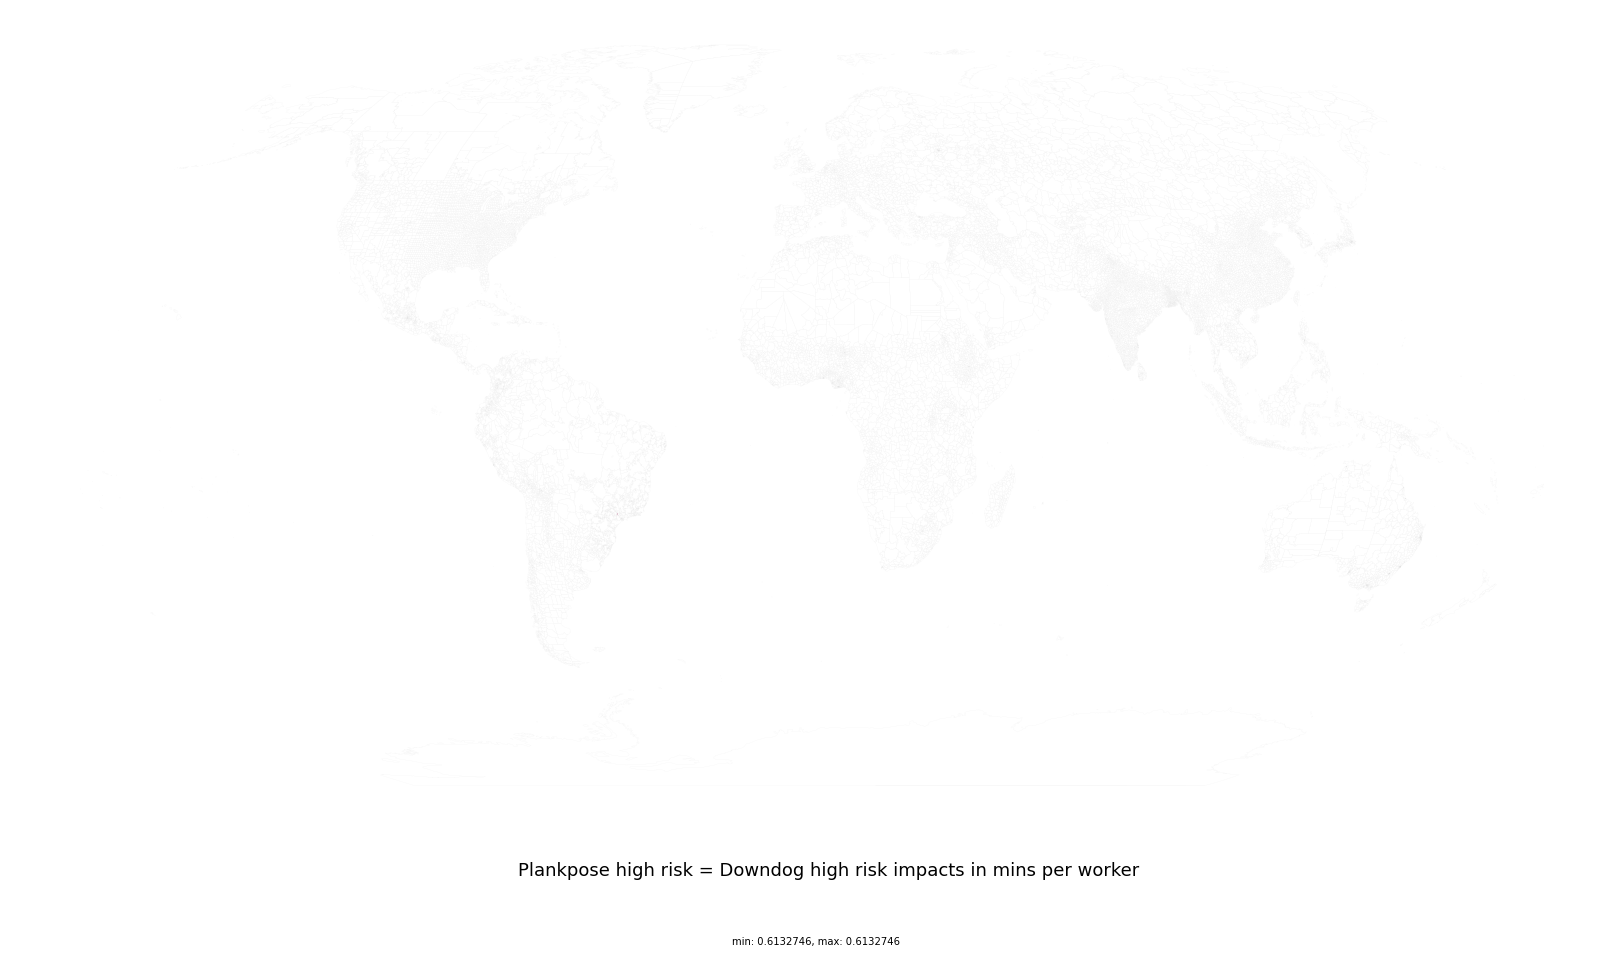

In [7]:
# compare plankpose high risk = downdog high risk
dd_hr = pd.read_csv(f"{downdog}/{basename}-highriskimpacts-combined.csv")
dd_hr = dd_hr.loc[dd_hr['year']==2099]

# merge
pd_hr = pd.merge(pp_hr, dd_hr, how='inner', on=['region', 'value', 'year'])
pd_hr = pd_hr.rename(columns={"region": "hierid"})
# pp_dd.hierid.astype(object)

# change crs to World_Robinson to make the standard CIL map and make map
map = shp_file.merge(pd_hr, on='hierid', how='left').to_crs('World_Robinson')

make_map(
    df=map,
    colname='value',
    title="Plankpose high risk = Downdog high risk impacts in mins per worker",
    name_file='map_pp_dd_hr.pdf',
    location=(0.45, -0.15),
    figsize=(30, 15),
    color_scale="Spectral_r",
    color_max=None,
    color_min=None,
    save_path=None,
    maxmin=True,
)

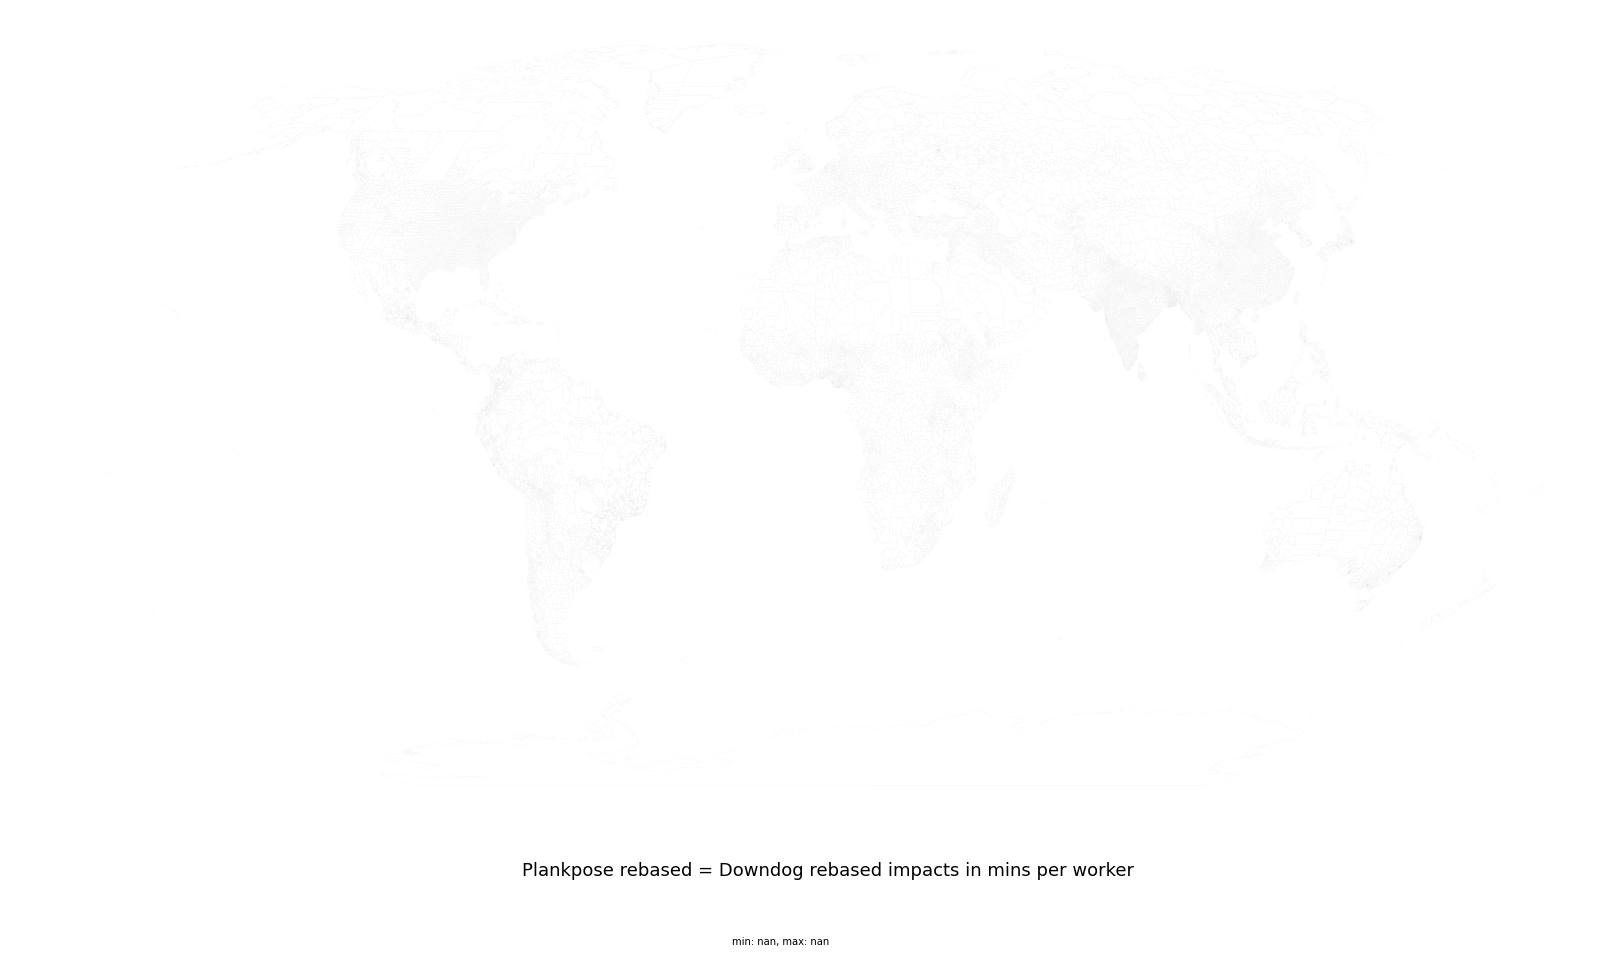

In [8]:
# compare plankpose rebased = downdog rebased
pp_r = pd.read_csv(f"{plankpose}/{basename}-rebased.csv")
pp_r = pp_r.loc[pp_r['year']==2099]

dd_r = pd.read_csv(f"{downdog}/{basename}-rebased_new-combined.csv")
dd_r = dd_r.loc[dd_r['year']==2099]

# merge
pd_r = pd.merge(pp_r, dd_r, how='inner', on=['region', 'value', 'year'])
pd_r = pd_r.rename(columns={"region": "hierid"})
# pp_dd_r.hierid.astype(object)

# change crs to World_Robinson to make the standard CIL map and make map
map = shp_file.merge(pd_r, on='hierid', how='left').to_crs('World_Robinson')

make_map(
    df=map,
    colname='value',
    title="Plankpose rebased = Downdog rebased impacts in mins per worker",
    name_file='map_pp_dd_r.pdf',
    location=(0.45, -0.15),
    figsize=(30, 15),
    color_scale="Spectral_r",
    color_max=None,
    color_min=None,
    save_path=None,
    maxmin=True,
)

In [9]:
df_hl = pd.merge(pp_hr, pp_lr, on=['region', 'year'])
df_hl['diff'] = df_hl['value_x'] - df_hl['value_y']
df_hl['diff'] = df_hl['diff'].abs()
df_hl.loc[df_hl['diff']==0]

,region,year,value_x,value_y,diff
119,CAN.2.36.981,2099,0.297518,0.297518,0.0
417,CAN.2.36.975,2099,0.297518,0.297518,0.0
423,CAN.2.36.991,2099,0.289629,0.289629,0.0
467,CAN.2.28.740,2099,0.270049,0.270049,0.0
491,CAN.2.28.741,2099,0.278829,0.278829,0.0
...,...,...,...,...,...
24314,GBR.1.Recde9a4bac4e42e8,2099,0.122650,0.122650,0.0
24315,GBR.1.Rfd8447b79670bded,2099,0.121992,0.121992,0.0
24316,GBR.1.R3942eab396414690,2099,0.119137,0.119137,0.0
24317,GBR.1.R2b01487236d7a539,2099,0.118335,0.118335,0.0


In [10]:
df_hl[['value_x', 'value_y', 'diff']].rename(columns={"value_x": "plankpose_high", "value_y": "plankpose_low"}).describe()

,plankpose_high,plankpose_low,diff
count,24378.000000,24378.000000,24378.000000
mean,-0.325897,-0.909772,0.913654
std,1.501807,1.046865,1.069366
min,-23.306860,-5.520468,0.000000
25%,-0.446889,-1.513838,0.173207
50%,-0.020758,-0.641913,0.704337
75%,0.219350,-0.024678,1.226265
max,6.422452,0.616417,19.960819


In [11]:
df_hl[df_hl['diff'] < 0.0001]

,region,year,value_x,value_y,diff
119,CAN.2.36.981,2099,0.297518,0.297518,0.0
417,CAN.2.36.975,2099,0.297518,0.297518,0.0
423,CAN.2.36.991,2099,0.289629,0.289629,0.0
467,CAN.2.28.740,2099,0.270049,0.270049,0.0
491,CAN.2.28.741,2099,0.278829,0.278829,0.0
...,...,...,...,...,...
24314,GBR.1.Recde9a4bac4e42e8,2099,0.122650,0.122650,0.0
24315,GBR.1.Rfd8447b79670bded,2099,0.121992,0.121992,0.0
24316,GBR.1.R3942eab396414690,2099,0.119137,0.119137,0.0
24317,GBR.1.R2b01487236d7a539,2099,0.118335,0.118335,0.0


In [12]:
df_hr = pd.merge(pp_hr, dd_hr, on=['region', 'year'])
df_hr['diff'] = df_hr['value_x'] - df_hr['value_y']
df_hr['diff'] = df_hr['diff'].abs()
df_hr.loc[df_hr['diff']==0]

,region,year,value_x,value_y,diff
15874,BRA.25.5142.9664,2099,0.613275,0.613275,0.0


In [13]:
df_hr[['value_x', 'value_y', 'diff']].rename(columns={"value_x": "plankpose_high", "value_y": "downdog_high"}).describe()

,plankpose_high,downdog_high,diff
count,24378.000000,24378.000000,24378.000000
mean,-0.325897,-0.365636,0.463923
std,1.501807,1.699852,0.694106
min,-23.306860,-23.869440,0.000000
25%,-0.446889,-0.953374,0.017562
50%,-0.020758,-0.087677,0.094016
75%,0.219350,0.478326,0.694103
max,6.422452,7.619677,6.137059


In [14]:
# df_hr[df_hr['diff'].between(-0.001, 0.001)]
df_hr[df_hr['diff'] < 0.0001]

,region,year,value_x,value_y,diff
1072,ETH.3.13.62,2099,0.419611,0.419517,0.000094
1130,ETH.3.16.80,2099,0.439970,0.440055,0.000085
2684,TZA.22.115,2099,0.520321,0.520221,0.000100
2789,TZA.17.90,2099,0.495755,0.495733,0.000022
6185,BGD.2.4.9.66,2099,0.343903,0.343813,0.000090
...,...,...,...,...,...
23692,PRK.9.Rfc1a09605564a52c,2099,0.332638,0.332678,0.000040
23734,LKA.23.R36d550ef9347deb2,2099,0.345214,0.345133,0.000082
23980,MMR.5.16.86,2099,-5.289930,-5.289910,0.000020
24028,MMR.12.52.248,2099,0.575409,0.575416,0.000007


In [15]:
df_r = pd.merge(pp_r, dd_r, on=['region', 'year'])
df_r['diff'] = df_r['value_x'] - df_r['value_y']
df_r['diff'] = df_r['diff'].abs()
df_r.loc[df_r['diff']==0]

,region,year,value_x,value_y,diff


In [16]:
df_r[['value_x', 'value_y', 'diff']].rename(columns={"value_x": "plankpose_rebased", "value_y": "downdog_rebased"}).describe()

,plankpose_rebased,downdog_rebased,diff
count,24378.000000,24378.000000,24378.000000
mean,-0.475906,-0.639196,0.323953
std,0.999173,1.175987,0.361563
min,-23.938538,-24.497787,0.000006
25%,-0.730932,-0.861819,0.080133
50%,-0.290824,-0.425833,0.205057
75%,0.049360,-0.142987,0.457745
max,2.139565,5.324445,4.784178
